In [ ]:
!git clone https://github.com/SofiaShamrikova/ProjectStroke

Cloning into 'ProjectStroke'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), 647.68 KiB | 5.73 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Этот датасет содержит информацию о возможных факторах, влияющих на риск инсульта, и был ли приступ уже. На его основе мы планируем обучить модель, которая, анализируя данные о человеке, сможет прогнозировать, случится ли у него инсульт.

Описние данных:

id - уникальный идентификатор

gender - "Мужской", "Женский" или "Другой"

age - возраст пациента

hypertension - 0, если у пациента нет гипертонии, 1, если у пациента гипертония

heart_disease - 0, если у пациента нет заболеваний сердца, 1, если у пациента есть заболевание сердца

ever_married - был ли брак, "Нет" или "Да"

work_type - вид занятости(карьера), "детский", "государственный", "никогда не работавший", "частный" или "самозанятый"

Residence_type - местность проживания, "Сельская" или "Городская"

avg_glucose_level - средний уровень глюкозы в крови

bmi - индекс массы тела

smoking_status - курение : "ранее курил", "никогда не курил", "курит" или "неизвестно"*

stroke -  был ли инсульт: 1, если у пациента был инсульт или 0, если нет


*Примечание: «Неизвестно» в smoking_status означает, что информация для этого пациента недоступна.

In [ ]:
df = pd.read_csv('/content/ProjectStroke/health.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Мы видим, что есть много пропусков в столбце bmi.

Этот столбец обозначает индекс массы тела пациентов.

Пропусков всего 201 строка при том, что всего у нас более 5000 стр. Значит, мы можем подумать, как заполнить пропуски.

Имт- численный признак, который не может быть нулем, значит стоит заполнить его средним значением по столбцу, так как это не повлияет на метрики качества модели машинного обучения.

In [ ]:
df['bmi'].fillna(np.mean(df['bmi']), inplace=True)

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Таким образом, проблема с пропусками значений исправлена. Следовательно, данные теперь можно визуализировать.

Визуализация данных:

<Axes: xlabel='smoking_status', ylabel='count'>

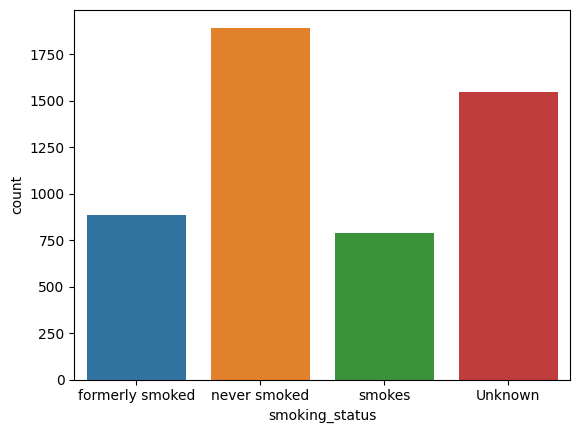

In [ ]:
sns.countplot(x=df['smoking_status'])

(-1.17998641970333,
 1.1934704834630845,
 -1.1522316681700318,
 1.1024863478739655)

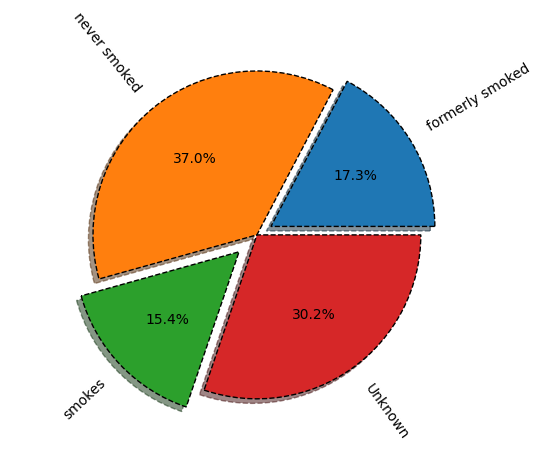

In [ ]:
vals = []
labels = df['smoking_status'].unique()

for lbl in labels:
    vals.append(df[df['smoking_status'] == lbl].shape[0])

explode = (0.1, 0, 0.15, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

ValueError: ignored

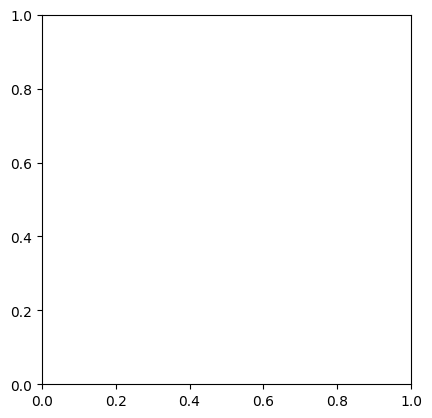

In [ ]:
vals = []
labels = df['gender'].unique()

for lbl in labels:
    vals.append(df[df['gender'] == lbl].shape[0])

explode = (0.15, 0, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.1026463651006564,
 1.1001260173857454,
 -1.104998357202118,
 1.2049666353586053)

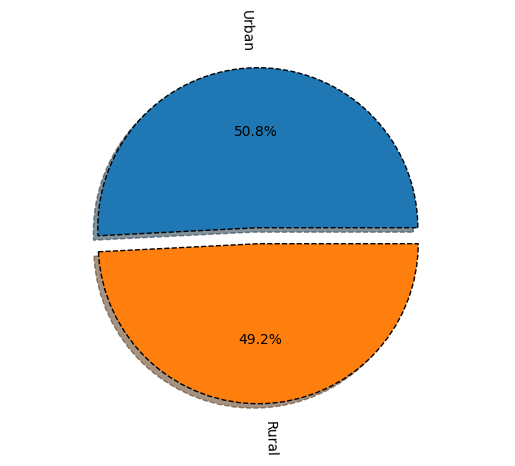

In [ ]:
vals = []
labels = df['Residence_type'].unique()

for lbl in labels:
    vals.append(df[df['Residence_type'] == lbl].shape[0])

explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.200117039398052, 1.1047674780665728, -1.0698592315800328, 1.13014036150418)

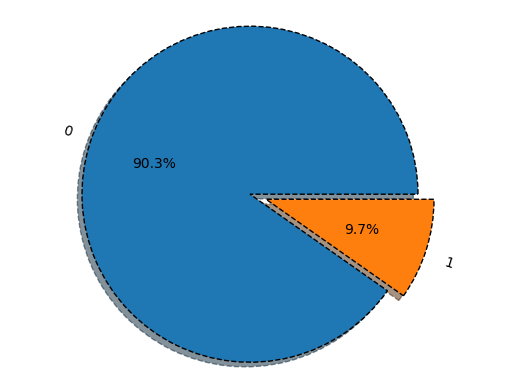

In [ ]:
vals = []
labels = df['hypertension'].unique()

for lbl in labels:
    vals.append(df[df['hypertension'] == lbl].shape[0])

explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

(-1.138677896040699,
 1.416098772612873,
 -1.2555625932782941,
 1.2094698421793773)

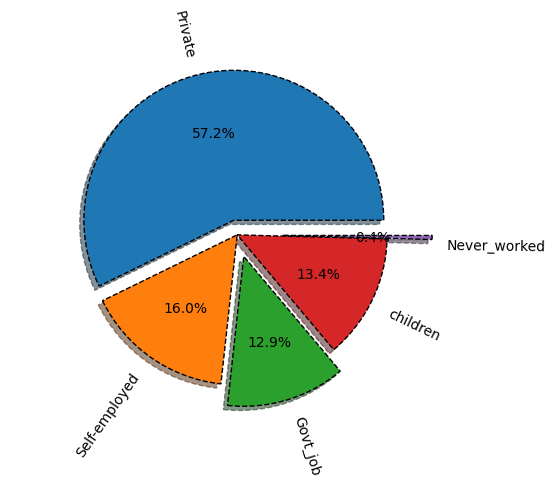

In [ ]:
vals = []
labels = df['work_type'].unique()

for lbl in labels:
    vals.append(df[df['work_type'] == lbl].shape[0])

explode = (0.1, 0, 0.15, 0, 0.3)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

описание круговых диаграмм:

на первой диаграмме мы видим, что большинство опрошенных никогда не курили

по второй диаграмме видно, что большинство опрошенных - женщины

по данным третьей диаграмме можно сделать вывод, что процент проживающих в городе выше, чем в сельской местности

на третьей диаграмме видно, что подавляющее большинство людей из выбранной базы данных не имеют гипертонии

по данным четвертой диаграммы самый высокий процент пациентов работает в частных компаниях

Text(0.5, 1.0, 'Начальная корреляция')

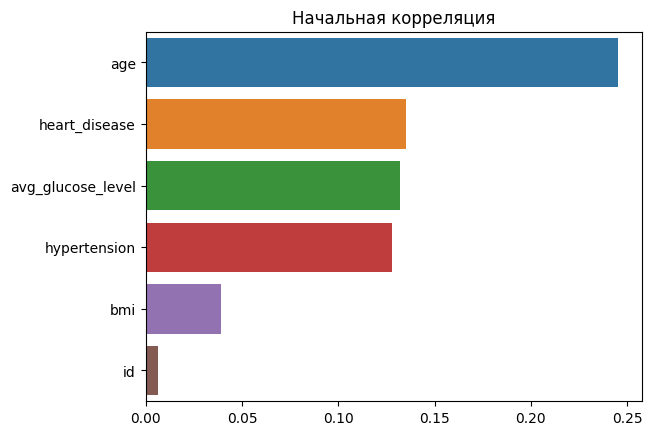

In [ ]:
numeric_data = df.drop(columns=['stroke']).select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = df.drop(columns=['stroke'])[numeric_features].corrwith(df['stroke']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title('Начальная корреляция')

На данном графике видна корреляция между различными признаками и фактом наличия инсульта у пациентов. Так, относительно высокое значение корреляции прослеживается между возрастом человека и фактом инсульта. Также, исходя из графика, можно сделать вывод, что на инсульт незначительно заболевания сердца, уровень глюкозы в крови и гипертония. При этом, что интересно, индекс массы тела имеет очень слабую корреляцию с инсультом.

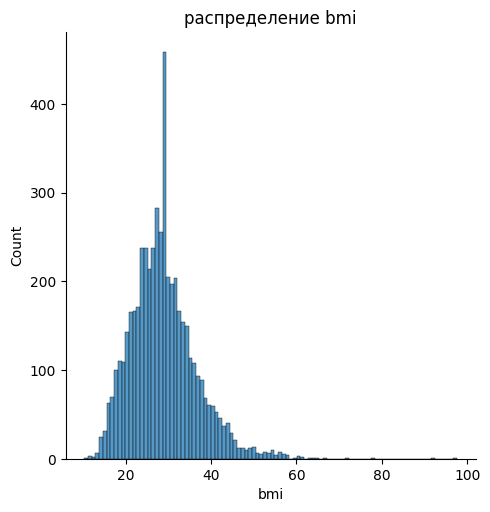

In [ ]:
sns.displot(df['bmi'], bins=100)

plt.title('распределение bmi')
plt.show()

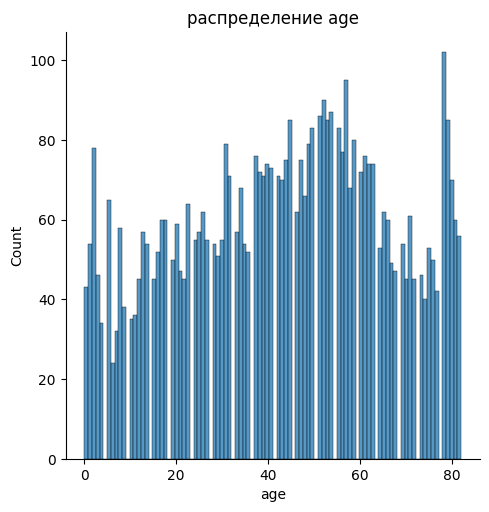

In [ ]:
sns.displot(df['age'], bins=100)

plt.title('распределение age')
plt.show()

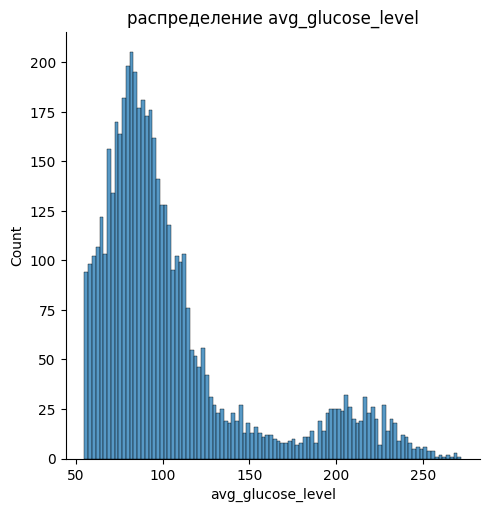

In [ ]:
sns.displot(df['avg_glucose_level'], bins=100)

plt.title('распределение avg_glucose_level')
plt.show()

На графиках выше можно увидеть распределение показателей

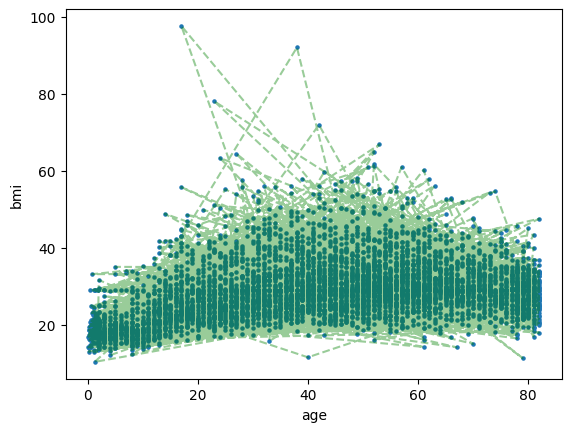

In [ ]:
df.plot(x="age", y="bmi", kind="scatter", s=5)
plt.plot(df["age"], df["bmi"], "g--", alpha=0.4)

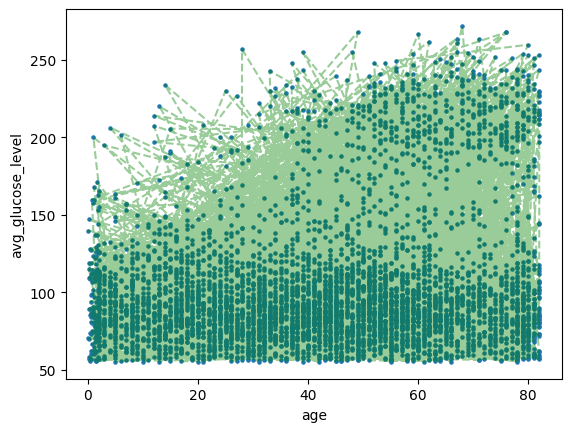

In [ ]:
df.plot(x="age", y="avg_glucose_level", kind="scatter", s=5)
plt.plot(df["age"], df["avg_glucose_level"], "g--", alpha=0.4)

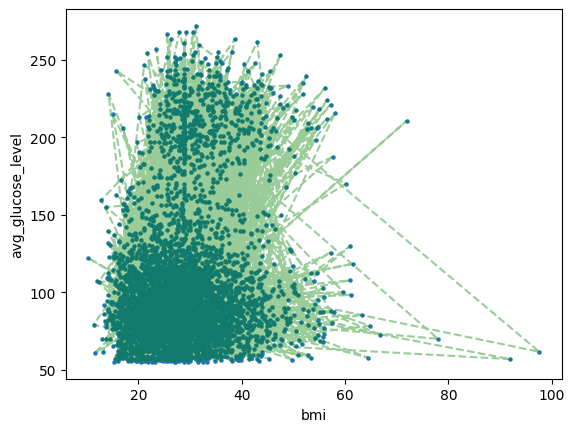

In [ ]:
df.plot(x="bmi", y="avg_glucose_level", kind="scatter", s=5)
plt.plot(df["bmi"], df["avg_glucose_level"], "g--", alpha=0.4)

На последних трех графиках линейная заисимость между выбранными признаками не наблюдается

### Гипотеза: Существует связь между возрастом (Age) и риском развития инсульта.

Для проверки этой гипотезы можно использовать статистические методы, такие как t-тест или анализ дисперсии (ANOVA).

Примерный план действий:

Разделите данные на две группы: пациенты с инсультом и пациенты без инсульта.
Сравните средний возраст между этими двумя группами.
Примените статистический тест, такой как t-тест или ANOVA, чтобы определить, есть ли статистически значимая разница между группами.
Проанализируйте результаты теста и сделайте выводы о наличии или отсутствии связи между возрастом и риском развития инсульта.

In [ ]:
import pandas as pd
import scipy.stats as stats

data = pd.read_csv('/content/ProjectStroke/health.csv')

stroke_patients = data[data['stroke'] == 1]['age']
non_stroke_patients = data[data['stroke'] == 0]['age']

t_statistic, p_value = stats.ttest_ind(stroke_patients, non_stroke_patients)

print('T-статистика:', t_statistic)
print('p-значение:', p_value)

T-статистика: 18.08083426887953
p-значение: 7.0307775129939774e-71


Результаты анализа данных показывают, что значение t-статистики равно 18.08, а p-значение составляет 7.03 * 10^-71.

На основе этих результатов можно сделать вывод, что существует статистически значимая разница в среднем возрасте между пациентами с инсультом и пациентами без инсульта. P-значение, которое близко к нулю, указывает на то, что разница в возрасте между этими двумя группами является значимой.

Таким образом, на основе данного анализа можно подтвердить гипотезу о связи между возрастом и риском развития инсульта в исследуемой выборке данных.

# Шаг 5. Создание новых признаков

### **BMI Категории**: 
У нас уже есть признак BMI, но мы могли бы разделить его на категории. Например: "underweight", "normal", "overweight", "obese". Это может позволить модели уловить нелинейные зависимости между BMI и риском инсульта.

In [23]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['underweight', 'normal', 'overweight', 'obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

В этом коде мы создаем функцию bmi_category(), которая принимает значение BMI и возвращает соответствующую категорию. Затем мы применяем эту функцию к столбцу BMI нашего DataFrame и создаем новый столбец 'bmi_category'.

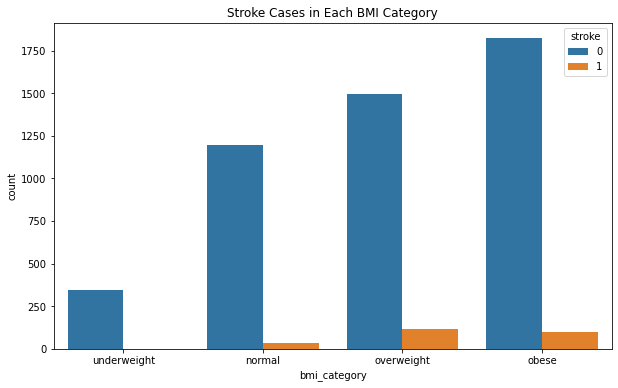

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bmi_category', hue='stroke')
plt.title('Stroke Cases in Each BMI Category')
plt.show()

Этот график показывает количество случаев инсульта в каждой категории BMI. В каждой категории два столбца: один для случаев без инсульта (stroke = 0) и один для случаев с инсультом (stroke = 1). Это позволяет вам сравнить вероятность инсульта в различных категориях BMI.

Комментарии: по графику мы можем увидеть что существует заметные различия в распределении инсультов между различными категориями BMI

### **Age Group**: 
Мы можем разделить возраст на группы. Например: "Child" (0-18), "Adult" (19-64), "Senior" (65+). Это могло бы упростить зависимость между возрастом и инсультом, которая может быть сложной.

In [25]:
def age_group(age):
    if age <= 18:
        return 'Child'
    elif 18 < age <= 64:
        return 'Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)

Аналогично предыдущему шагу, создаем функцию age_group(), которая принимает возраст и возвращает соответствующую категорию. Затем применяем эту функцию к столбцу 'age' в нашем DataFrame и создаем новый столбец 'age_group'.

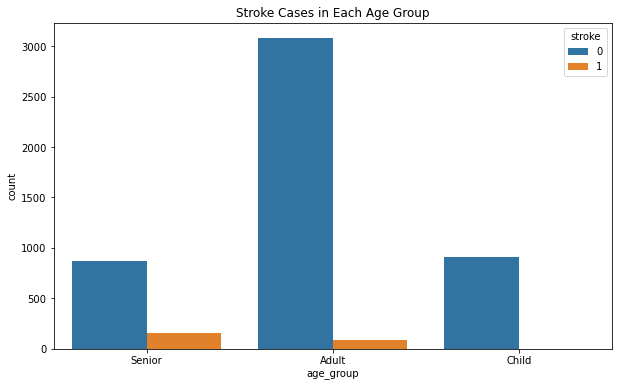

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='stroke')
plt.title('Stroke Cases in Each Age Group')
plt.show()

Этот график показывает количество случаев инсульта в каждой возрастной группе, что может помочь вам понять, как возраст влияет на риск инсульта.

Комментарии: мы можем увидеть, что в группе "adult" кол-во без инсультов больше чем с инсультом, а в группе "Child" с инсультом почти нет

### **Lifestyle Score**: 
Основываясь на сведениях о курении и типе работы, можно было бы создать "балл образа жизни", где более здоровые образы жизни получают нижний балл, а менее здоровые - высший.

В первую очередь, нам нужно преобразовать категориальные данные в численные, чтобы мы могли их комбинировать. Допустим, мы присвоим следующие числа статусу курения:

- Никогда не курил: 0

- Когда-то курил: 1

- Курит: 2

И для типа работы мы присвоим:

- Дети: 0

- Никогда не работал: 1

- Самозанятый: 2

- Частная работа: 3

- Государственная работа: 4

In [27]:
def smoking_score(smoking_status):
    if smoking_status == 'never smoked':
        return 0
    elif smoking_status == 'formerly smoked':
        return 1
    else:
        return 2

def work_score(work_type):
    if work_type == 'children':
        return 0
    elif work_type == 'Never_worked':
        return 1
    elif work_type == 'Self-employed':
        return 2
    elif work_type == 'Private':
        return 3
    else:
        return 4

df['smoking_score'] = df['smoking_status'].apply(smoking_score)
df['work_score'] = df['work_type'].apply(work_score)
df['lifestyle_score'] = df['smoking_score'] + df['work_score']

Здест выше создаем два новых признака 'smoking_score' и 'work_score', преобразуя статус курения и тип работы в числовые значения, а затем комбинирует их в новый признак 'lifestyle_score'.

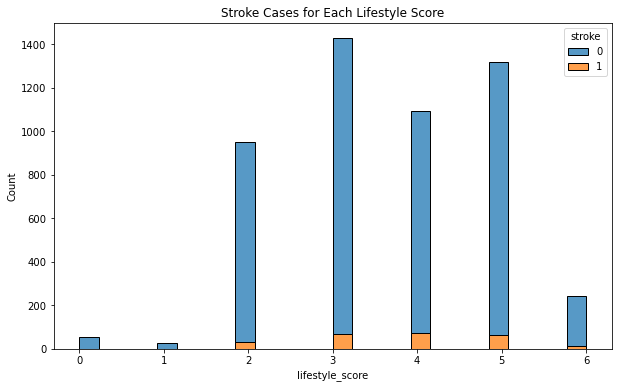

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lifestyle_score', hue='stroke', multiple="stack")
plt.title('Stroke Cases for Each Lifestyle Score')
plt.show()

Комментарии:

# Шаг 6. Гипотезы

### Возраст и инсульт: 
Можно проверить, есть ли статистически значимая разница в распределении возраста между людьми, которые перенесли инсульт, и теми, кто не перенес. Для этого можно использовать t-тест для двух независимых выборок (также известный как t-тест Стьюдента).

Гипотеза звучит следующим образом:

- Нулевая гипотеза (H0): средний возраст людей, перенесших инсульт, равен среднему возрасту людей, которые не перенесли инсульт.

- Альтернативная гипотеза (H1): средний возраст людей, перенесших инсульт, отличается от среднего возраста людей, которые не перенесли инсульт.

In [29]:
from scipy import stats

stroke_group = df[df['stroke'] == 1]['age']
no_stroke_group = df[df['stroke'] == 0]['age']
t_stat, p_val = stats.ttest_ind(stroke_group, no_stroke_group)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")

t-statistic: 18.08083426887953
p-value: 7.0307775129939774e-71


В коде выше разделяем данные на две группы: людей, которые перенесли инсульт (stroke_group), и людей, которые не перенесли инсульт (no_stroke_group).

Затем используем функцию ttest_ind из библиотеки scipy.stats для проведения t-теста. Эта функция возвращает два значения: t-статистику и p-значение.

T-статистика - это мера того, насколько наши группы отличаются от друг друга, а p-значение - это вероятность того, что такие или более сильные различия могли бы получиться случайно. Если p-значение меньше уровня значимости (обычно 0.05), то мы отвергаем нулевую гипотезу и признаем, что есть статистически значимые различия между группами.

 **Выводы**:
В ходе исследования была проведена статистическая проверка гипотезы о равенстве среднего возраста людей, перенесших инсульт, и тех, кто инсульт не перенес. Был применён t-тест Стьюдента для двух независимых выборок.

Результаты t-теста показывают значимую статистическую разницу между средним возрастом людей, перенесших инсульт, и средним возрастом людей, не перенесших инсульт. Полученное t-значение 18.08 говорит о значительном отклонении между сравниваемыми группами.

P-значение 7.03e-71, значительно меньше стандартного уровня значимости (0.05), позволяет нам отвергнуть нулевую гипотезу. Таким образом, на основании проведенного анализа, мы можем утверждать, что есть статистически значимое различие в возрасте между группами, перенесшими и не перенесшими инсульт.

Это означает, что возраст может быть важным фактором, влияющим на риск развития инсульта. Эти результаты подтверждают нашу первоначальную гипотезу, что средний возраст людей, перенесших инсульт, отличается от среднего возраста людей, которые инсульт не перенесли.

Таким образом, важно учитывать возраст в качестве потенциального фактора риска при анализе причин и последствий инсульта, что может помочь в диагностике и профилактике этого заболевания.

### **Гипертония и инсульт**: 
Проверим, есть ли статистически значимая связь между наличием гипертонии и инсульта. Здесь можно использовать тест хи-квадрат для проверки независимости двух категориальных переменных.

Чтобы проверить эту гипотезу, можно использовать хи-квадрат тест независимости. Этот тест проверяет, есть ли статистически значимая взаимосвязь между двумя категориальными переменными.

- Нулевая гипотеза (H0): Нет взаимосвязи между гипертонией и инсультом.
- Альтернативная гипотеза (H1): Есть взаимосвязь между гипертонией и инсультом.

In [30]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['hypertension'], df['stroke'])
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_val}")

Chi-square statistic: 81.6053682482931
p-value: 1.661621901511823e-19


Результаты теста показывают, что статистика хи-квадрат составляет примерно 81.61, а p-значение очень мало (1.66e-19), что значительно меньше стандартного уровня значимости 0.05.

На основании этих результатов мы можем отвергнуть нулевую гипотезу, что нет взаимосвязи между гипертонией и инсультом. Это говорит о том, что есть статистически значимая взаимосвязь между гипертонией и инсультом.

**Вывод**: В рамках исследования был проведен хи-квадрат тест независимости с целью проверки наличия статистически значимой взаимосвязи между наличием гипертонии и вероятностью инсульта.

Статистическое значение хи-квадрат составляет 81.61, а p-значение, равное 1.66e-19, значительно меньше стандартного уровня значимости (0.05). Эти результаты указывают на то, что наблюдаемые различия в данных могут быть статистически значимы.

На основании этих результатов мы можем отвергнуть нулевую гипотезу о том, что нет взаимосвязи между гипертонией и инсультом. Это говорит о том, что наличие гипертонии может быть связано с повышенным риском инсульта.

Однако важно отметить, что эти результаты не указывают на прямую причинно-следственную связь. Наличие гипертонии не обязательно вызывает инсульт, но может служить фактором, увеличивающим риск.

Эти результаты важны для медицинской науки и практики. Они могут указывать на необходимость проведения дальнейших исследований этой связи и подчеркивать значимость контроля гипертонии для предотвращения инсультов.

### Связь "Lifestyle Score" и инсульта:
Можно проверить, есть ли статистически значимая разница в "Lifestyle Score" между теми, кто перенес инсульт, и теми, кто не перенес. Для этого также подойдет t-тест для двух независимых выборок. Если "Lifestyle Score" можно считать категориальной переменной (например, низкий, средний, высокий), тогда более подходящим будет использование теста хи-квадрат.

- Нулевая гипотеза (H0): Средний "Lifestyle Score" людей, перенесших инсульт, равен среднему "Lifestyle Score" людей, не перенесших инсульт.
- Альтернативная гипотеза (H1): Средний "Lifestyle Score" людей, перенесших инсульт, отличается от среднего "Lifestyle Score" людей, не перенесших инсульт.

In [31]:
from scipy.stats import ttest_ind

stroke_group = df[df['stroke'] == 1]['lifestyle_score']
no_stroke_group = df[df['stroke'] == 0]['lifestyle_score']
t_statistic, p_val = ttest_ind(stroke_group, no_stroke_group, nan_policy='omit')

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_val}")


t-statistic: 2.601466108914968
p-value: 0.009309404556817126


**Выводы**: 
Провели t-тест Стьюдента для сравнения среднего значения "Lifestyle Score" между группами людей, которые перенесли инсульт, и теми, кто не перенес. Этот тест основан на предположении, что ваши данные распределены нормально.

Значение t-статистики 2.60 указывает на статистически значимое различие между средними значениями этих двух групп. При этом p-значение 0.0093, которое меньше стандартного уровня значимости 0.05, позволяет нам отвергнуть нулевую гипотезу и заключить, что есть статистически значимое различие в "Lifestyle Score" между двумя группами.

Это указывает на то, что "Lifestyle Score" может влиять на вероятность инсульта, и люди с более высоким или более низким "Lifestyle Score" могут иметь больший или меньший риск инсульта соответственно.

Однако важно отметить, что хотя статистический анализ показал значимую корреляцию, это не обязательно означает прямую причинно-следственную связь. Другие переменные также могут играть роль, и следует провести дополнительное исследование, чтобы лучше понять эти взаимосвязи.

В любом случае, эти результаты подчеркивают важность учета "Lifestyle Score" при оценке риска инсульта.

# 3. Обучение модели

# Предобработка данных

Прежде чем подавать данные на обучение модели, дополнительно проанализируем данные и проведем необходимую предобработку.

Посмотрим есть ли дисбаланс между классами в нашем датасете.

Text(0.5, 1.0, 'Распределение классов/людей, у которых был инсульт и не было')

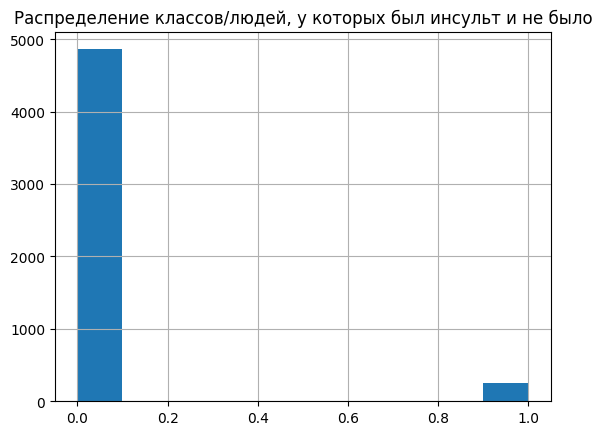

In [ ]:
df['stroke'].astype(int).hist()
plt.title("Распределение классов/людей, у которых был инсульт и не было")

~~мне пизда~~

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Видим, что датасет очень несбалансирован, наблюдения положительного класса составляют только ~5% от всей выборки.

Проверим числовые признаки на наличие выбросов.

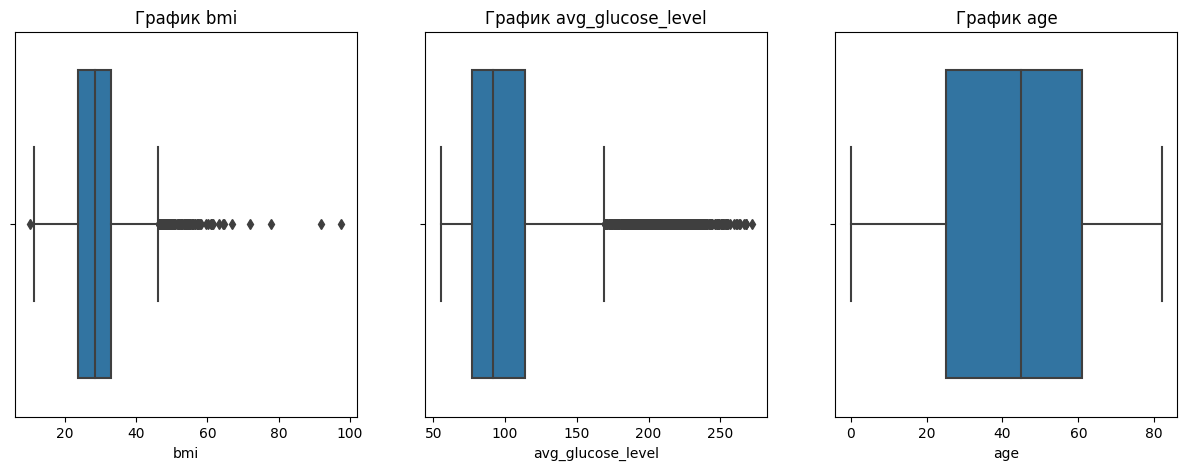

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df['bmi'], ax=ax1)
ax1.set_title('График bmi')

sns.boxplot(x=df['avg_glucose_level'], ax=ax2)
ax2.set_title('График avg_glucose_level')

sns.boxplot(x=df['age'], ax=ax3)
ax3.set_title('График age')

plt.show()

Видим, что в значениях bmi есть выбросы - избавимся от них чтобы они не мешали дальнейшему обучению модели.

In [ ]:
df.drop(df[df['bmi']>65].index, inplace=True)

Далее, преобразуем категориальные признаки в числовые и приведем числовые к одному масштабу с помощью нормирования.

In [ ]:
num_features = ['age', 'avg_glucose_level', 'bmi']
cat_features = ['gender', 'hypertension', 'ever_married', "work_type", 'Residence_type', 'smoking_status']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), num_features),
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop="first",
                         min_frequency=0.01), cat_features)
])

Далее разобьем выборку на тренировочную и тестовую с учетом того, что доля женщин и куривших и наблюдений отрицательного класса в выборке преобладает.

Проверяем есть ли в колонках, по которым мы будем стратифицировать train_test_split, такие значения которые встречаются только один раз - если они есть, то стратифицировать не получится и их надо будет удалить.

In [ ]:
df[['smoking_status']].value_counts()

smoking_status 
never smoked       1890
Unknown            1542
formerly smoked     885
smokes              788
dtype: int64

In [ ]:
df[['gender']].value_counts()

gender
Female    2992
Male      2112
Other        1
dtype: int64

In [ ]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

In [ ]:
df.set_index('id', inplace=True) # делаем айди индексом чтоб он не попал в выборку как признак

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df[['gender', 'smoking_status', 'stroke']], random_state=1)

Получим признаки и целевые метки обучающей и тестовой выборки.

In [ ]:
y_train = df_train['stroke']
y_test = df_test['stroke']

X_train = df_train.drop('stroke', axis=1)
X_test = df_test.drop('stroke', axis=1)

Так как нашей задачей стоит построить модель, которая предсказывала бы вероятность возникновения инсульта у человека, т.е мы решаем задачу классификации, мы используем три соответствующие модели - кэтбуст классифаер,  лог регрессию и модель случайного леса.

В качестве scoring (в случае catboost eval metric) используем F1 score, т.к нам важно "поймать" как можно больше людей в зоне риска. Однако из-за несбалансированности датасета, привести и recall и precision к высоким значениям не получится, так что учитывая нашу задачу, мы будем приоритизировать recall.

Также мы будем учитывать logloss, чтоб брать не только правильность предсказанного класса, но и уверенность модели в предсказаниях.

In [ ]:
# Подгоняем датасеты под кэтбустный пул
train_dataset = cb.Pool(X_train,y_train, cat_features=cat_features)
eval_dataset = cb.Pool(X_test, y_test, cat_features=cat_features)

model = cb.CatBoostClassifier(iterations=1000,
                              loss_function='Logloss',
                              eval_metric = 'F1',
                              silent=True,
                              scale_pos_weight=19)


grid = {'learning_rate': [0.03, 0.04, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5,]}


model.grid_search(grid,train_dataset)

# обучаем модель с преждевременной остановкой если нет улучшении в метриках спустя 50 итераций
model.fit(train_dataset,
          eval_set=eval_dataset,
          early_stopping_rounds=50,
          plot=True,
          silent=False,
          use_best_model=True)


bestTest = 0.76
bestIteration = 0

0:	loss: 0.7600000	best: 0.7600000 (0)	total: 6.36s	remaining: 2m 45s

bestTest = 0.76
bestIteration = 0

1:	loss: 0.7600000	best: 0.7600000 (0)	total: 11s	remaining: 2m 17s

bestTest = 0.7749648383
bestIteration = 2

2:	loss: 0.7749648	best: 0.7749648 (2)	total: 17.1s	remaining: 2m 16s

bestTest = 0.76
bestIteration = 0

3:	loss: 0.7600000	best: 0.7749648 (2)	total: 21.8s	remaining: 2m 5s

bestTest = 0.76
bestIteration = 0

4:	loss: 0.7600000	best: 0.7749648 (2)	total: 27.4s	remaining: 2m

bestTest = 0.7749648383
bestIteration = 2

5:	loss: 0.7749648	best: 0.7749648 (2)	total: 32.5s	remaining: 1m 53s

bestTest = 0.76
bestIteration = 0

6:	loss: 0.7600000	best: 0.7749648 (2)	total: 37.2s	remaining: 1m 46s

bestTest = 0.76
bestIteration = 0

7:	loss: 0.7600000	best: 0.7749648 (2)	total: 43.2s	remaining: 1m 42s

bestTest = 0.7744202389
bestIteration = 2

8:	loss: 0.7744202	best: 0.7749648 (2)	total: 48.1s	remaining: 1m 36s

bestTest = 0.7727910238
best

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7919285	test: 0.7556341	best: 0.7556341 (0)	total: 9.45ms	remaining: 9.44s
1:	learn: 0.8515144	test: 0.6710817	best: 0.7556341 (0)	total: 40.3ms	remaining: 20.1s
2:	learn: 0.8398568	test: 0.6418919	best: 0.7556341 (0)	total: 51.8ms	remaining: 17.2s
3:	learn: 0.8341463	test: 0.7048225	best: 0.7556341 (0)	total: 63.7ms	remaining: 15.8s
4:	learn: 0.8160510	test: 0.7638191	best: 0.7638191 (4)	total: 68.9ms	remaining: 13.7s
5:	learn: 0.8075288	test: 0.7671098	best: 0.7671098 (5)	total: 73.2ms	remaining: 12.1s
6:	learn: 0.8118099	test: 0.7671098	best: 0.7671098 (5)	total: 96ms	remaining: 13.6s
7:	learn: 0.8076418	test: 0.7736306	best: 0.7736306 (7)	total: 100ms	remaining: 12.5s
8:	learn: 0.7994710	test: 0.7751336	best: 0.7751336 (8)	total: 104ms	remaining: 11.5s
9:	learn: 0.8056217	test: 0.7736306	best: 0.7751336 (8)	total: 109ms	remaining: 10.8s
10:	learn: 0.8045676	test: 0.7717602	best: 0.7751336 (8)	total: 117ms	remaining: 10.5s
11:	learn: 0.8008622	test: 0.7755102	best: 0.775

In [ ]:
model.get_best_score()

{'learn': {'Logloss': 0.31282697827170713, 'F1': 0.8973013493253373},
 'validation': {'Logloss': 0.5202062455908675, 'F1': 0.7991987981972959}}

Получили наилучшие параметры (при заданных условиях) для нашей модели.

Поехали смотреть насколько хорошей вышла модель.

In [ ]:
cat_pred = model.predict(X_test)
cat_pred_proba = model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

cat_acc = accuracy_score(cat_pred, y_test)
cat_roc = roc_auc_score(y_test, cat_pred_proba)
cat_prec = precision_score(y_test, cat_pred)
cat_rec = recall_score(y_test, cat_pred)

print(f'ROC-AUC: {cat_roc}', f"Accuracy: {cat_acc}", f'Precision: {cat_prec}', f'Recall: {cat_rec}', sep='\n')

ROC-AUC: 0.8356172839506173
Accuracy: 0.7485322896281801
Precision: 0.14432989690721648
Recall: 0.84


In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(cat_pred, y_test, beta=1.5)

0.19368570415040792

<img src = 'https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/How-to-Deal-With-Imbalanced-Classification-and-Regression-Data_29-3372336075-1643136560469.jpg?resize=411%2C519&ssl=1' align='left'>


Попробуем улучшить значение precision, подобрав порог отсечения при выборе классов.

In [ ]:
from catboost.utils import select_threshold, get_roc_curve
roc_curve_values = get_roc_curve(model, train_dataset)
boundary = select_threshold(model, curve=roc_curve_values, FPR=0.15)
boundary

0.569566176454708

In [ ]:
cat_pred_n = 1*(cat_pred_proba >= boundary)

In [ ]:
cat_acc = accuracy_score(cat_pred_n, y_test)
cat_roc = roc_auc_score(y_test, cat_pred_proba)
cat_prec = precision_score(y_test, cat_pred_n)
cat_rec = recall_score(y_test, cat_pred_n)

print(f'ROC-AUC: {cat_roc}', f"Accuracy: {cat_acc}", f'Precision: {cat_prec}', f'Recall: {cat_rec}', sep='\n')

ROC-AUC: 0.8356172839506173
Accuracy: 0.8228962818003914
Precision: 0.16751269035532995
Recall: 0.66


Видим, что результаты стали лучше, при этом нам пришлось пожертвовать реколом (30% людей с риском инсульта умрут :D)

Далее обучим модель случайного леса с аналогичными параметрами, при этом используем оверсемплинг чтоб восполнить недостаток наблюдений с положительным классом.

In [ ]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=short_way, random_state=0)
X,y = smote_nc.fit_resample(df.drop("stroke", axis=1), df['stroke'])

over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

les = RandomForestClassifier(class_weight='balanced'

)

params = {'rf__n_estimators': np.arange(300, 1500, 100)
}

pipiline_rf = Pipeline([
    ('transformer', column_transformer),
    ('rf', les)
])

searcher_rf = GridSearchCV(
    pipiline_rf, params, scoring='f1', cv=4, n_jobs=-1)

searcher_rf.fit(over_X_train, over_y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       min_frequency=0.01),
                                                                         ['gender',
                                                                          'hypertension',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status'])])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'rf__n_estimators': array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
       1400])},
             scoring='f1')

In [ ]:
searcher_rf.best_params_

{'rf__n_estimators': 600}

In [ ]:
from joblib import dump, load
dump(searcher_rf, "berezka.joblib")

['berezka.joblib']

In [ ]:
rf_pred = searcher_rf.predict(X_test)
rf_proba = searcher_rf.predict_proba(X_test)[:,1]

In [ ]:
rf_acc = accuracy_score(rf_pred, y_test)
rf_roc = roc_auc_score(y_test, rf_proba)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)

print(f'ROC-AUC: {rf_roc}', f"Accuracy: {rf_acc}", f'Precision: {rf_prec}', f'Recall: {rf_rec}', sep='\n')

ROC-AUC: 0.984783950617284
Accuracy: 0.9814090019569471
Precision: 0.746031746031746
Recall: 0.94


Она идеальна.

Аналогично обучим модель логрег.
Тут применять оверсэмплинг мы не будем ввиду того, что в отличие от модели случайного леса, логрегрессия более чувствительна к возможным выбросам и более склонна к переобучению.

In [ ]:
from sklearn.linear_model import LogisticRegression

# задали вес классам, обратный их реальной пропорции в датасете
w = {0:5, 1:95}
log = LogisticRegression(random_state=13, class_weight=w)

pipiline_lr = Pipeline([
    ('transformer', column_transformer),
    ('lr', log)
])

# гиперпараметры для перебора - метод оптимизации и коэффициент регуляризации
params = {'lr__solver': [ 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr__C': np.logspace(-2, 4, 20)
}

lr_searcher = GridSearchCV(
    pipiline_lr, params, scoring='f1', cv=5, n_jobs=-1
)

lr_searcher.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       min_frequency=0.01),
                                                                         ['gender',
                                                                          'hypertension',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status'])])),
                                       ('lr',
                                        LogisticRegression(cl...
             param_grid={'lr__C': array([1.00000000e-02, 2.06913808e-02, 4.28133240e-02, 8.85866790e-02,
       1.83298071e-01, 3.79269019e-01, 7.84759970e-01, 1.62377674e+00,
       3.35981829e+00, 6.95192796e+00, 1.43844989e+01, 2.97635144e+01,
       6.15848211e+01, 1.27427499e+02, 2.63665090e+02, 5.45559478e+02,
       1.12883789e+03, 2.33572147e+03, 4.83293024e+03, 1.00000000e+04]),
                         'lr__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='f1')

In [ ]:
lr_searcher.best_params_

{'lr__C': 0.01, 'lr__solver': 'liblinear'}

In [ ]:
dump(lr_searcher, "log.joblib")

['berezka.joblib']

In [ ]:
lr_pred = lr_searcher.predict(X_test)
lr_proba = lr_searcher.predict_proba(X_test)[:,1]

In [ ]:
lr_acc = accuracy_score(lr_pred, y_test)
lr_roc = roc_auc_score(y_test, lr_proba)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)

print(f'ROC-AUC: {lr_roc}', f"Accuracy: {lr_acc}", f'Precision: {lr_prec}', f'Recall: {lr_rec}', sep='\n')

ROC-AUC: 0.8461522633744856
Accuracy: 0.7250489236790607
Precision: 0.13333333333333333
Recall: 0.84


Сразу же подберем порог отсечения для присвоения класса, чтоб поднять значение f-меры и precision.

In [ ]:
from sklearn.metrics import fbeta_score
fbet = []
porog = np.arange(0.1, 1, 0.05)
for i in porog:
  t = i
  p_pred = 1*(lr_proba >= t)
  fbet.append(fbeta_score(y_test, p_pred, beta=1.8))

t = porog[fbet.index(max(fbet))]

print('Наилучший порог:', porog[fbet.index(max(fbet))])

Наилучший порог: 0.7000000000000002


In [ ]:
lr_pred2 = 1*(lr_proba >= t)

lr_acc = accuracy_score(lr_pred2, y_test)
lr_roc = roc_auc_score(y_test, lr_proba)
lr_prec = precision_score(y_test, lr_pred2)
lr_rec = recall_score(y_test, lr_pred2)

print(f'ROC-AUC: {lr_roc}', f"Accuracy: {lr_acc}", f'Precision: {lr_prec}', f'Recall: {lr_rec}', sep='\n')

ROC-AUC: 0.8461522633744856
Accuracy: 0.8590998043052838
Precision: 0.20625
Recall: 0.66


------------

## Сравнение моделей

Сравним значения выбранных метрик.

In [ ]:
dic = {'Accuracy': [cat_acc, rf_acc, lr_acc], "Precision":[cat_prec, rf_prec, lr_prec],
           'Recall': [cat_rec, rf_rec, lr_rec], 'ROC-AUC': [cat_roc, rf_roc, lr_roc]}
df_comp = pd.DataFrame(dic, index=['Catboost', 'RF', 'LR'])
df_comp

,Accuracy,Precision,Recall,ROC-AUC
Catboost,0.829579,0.175258,0.708333,0.867228
RF,0.985309,0.770492,0.979167,0.997773
LR,0.859100,0.206250,0.660000,0.846152


Как можно видить, лучше всех себя показала модель случайного леса.

Далее сравним качество моделей через ROC-AUC кривые.

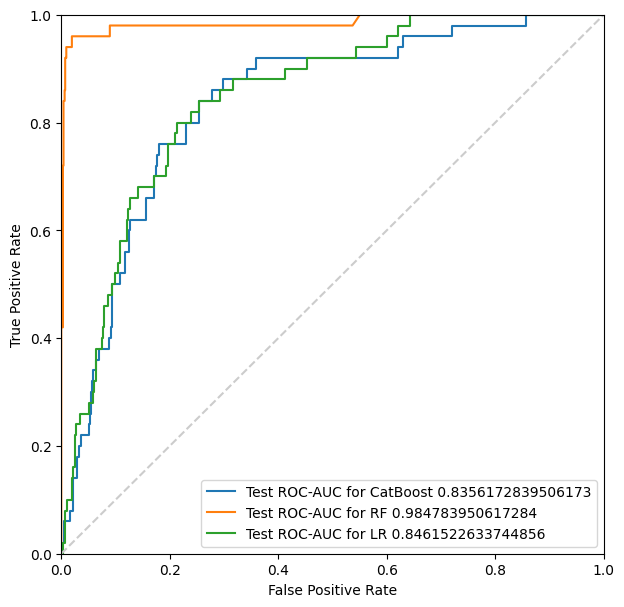

In [ ]:
from sklearn.metrics import roc_curve

def roc_auc_compare(y2_test, proba_1, proba_2, proba_3):
    fpr_test, tpr_test, thresholds_test = roc_curve(y2_test, proba_1)
    fpr_test_2, tpr_test_2, thresholds_test_2 = roc_curve(y2_test, proba_2)
    fpr_test_3, tpr_test_3, thresholds_test_3 = roc_curve(y2_test, proba_3)


    roc_auc_test = roc_auc_score(y2_test, proba_1)
    roc_auc_test_2 = roc_auc_score(y2_test, proba_2)
    roc_auc_test_3 = roc_auc_score(y2_test, proba_3)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test, tpr_test, label='Test ROC-AUC for CatBoost {0}'.format(roc_auc_test))
    plt.plot(fpr_test_2, tpr_test_2, label='Test ROC-AUC for RF {0}'.format(roc_auc_test_2))
    plt.plot(fpr_test_3, tpr_test_3, label='Test ROC-AUC for LR {0}'.format(roc_auc_test_3))
    plt.plot([0, 1], [0, 1], '--', color=(0.8, 0.8, 0.8))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');

roc_auc_compare(y_test, cat_pred_proba, rf_proba, lr_proba)

Отсюда же аналогичные выводы.

## И что?

Попробуем сделать какие-то выводы на основе наших моделей.

Так, посмотрим, какие признаки модели определили наиболее важными - или другими словами, какие признаки больше увеличивали вероятность меток 0 или 1.

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
transformer = searcher_rf.best_estimator_.named_steps['transformer']
transformed_names = transformer.get_feature_names_out()
transformed_names

array(['scaling__age', 'scaling__avg_glucose_level', 'scaling__bmi',
       'ohe__gender_Male', 'ohe__hypertension_1', 'ohe__ever_married_Yes',
       'ohe__work_type_Private', 'ohe__work_type_Self-employed',
       'ohe__work_type_children', 'ohe__work_type_infrequent_sklearn',
       'ohe__Residence_type_Urban', 'ohe__smoking_status_formerly smoked',
       'ohe__smoking_status_never smoked', 'ohe__smoking_status_smokes'],
      dtype=object)

In [ ]:
coefficients = lr_searcher.best_estimator_.steps[1][1].coef_

lr_feature_importance = pd.DataFrame({'Feature': list(X.columns), 'Importance': list(np.abs(coefficients))})
lr_feature_importance = lr_feature_importance.sort_values('Importance', ascending=True)
lr_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

ValueError: ignored

In [ ]:
feature_importances = searcher_rf.best_estimator_.named_steps['rf'].feature_importances_

In [ ]:
rf_feature_importance = pd.DataFrame(searcher_rf.best_estimator_.named_steps['rf'].feature_importances_,index = df_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=True)

plt.figure(figsize=(15,5))
plt.barh(rf_feature_importance.index, rf_feature_importance.importance)

ValueError: ignored

In [ ]:
cat_feature_importance = meow_searcher.feature_importances_
sorted_idx = np.argsort(cat_feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), cat_feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')